<a href="https://colab.research.google.com/github/Saba-Gul/Spam_detection_using_text_classification/blob/main/Spam_detection_using_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Spam Detection Using Text Classification**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/spam_dataset.csv')

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

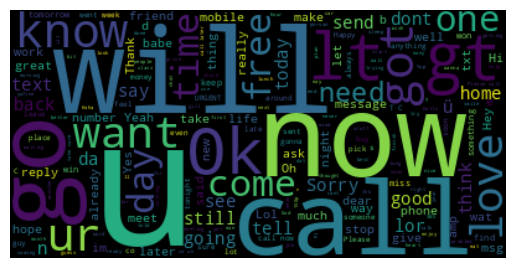

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['Message'])
wordcloud = WordCloud(max_words=200).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

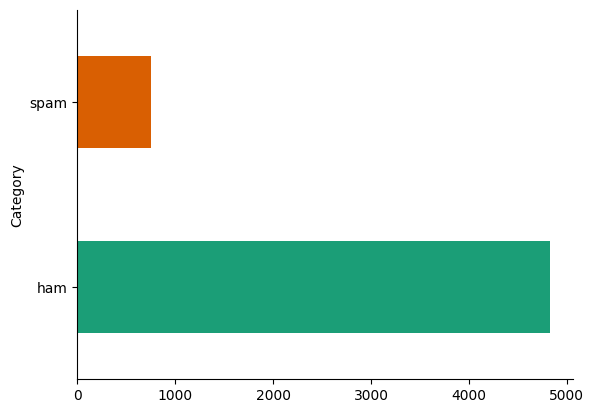

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def update(cat):
    if cat == "ham":
        return 0
    elif cat == "spam":
        return 1
    return cat


df["Category"] = df["Category"].apply(update)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+', ' ', text)  # Remove URLs
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()  # Stemmer for stemming

    # Tokenization
    words = word_tokenize(text)

    # Stop word removal, stemming, and lemmatization
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stop_words]

    return ' '.join(words)  # Convert list of words back to sentence

In [ ]:
df['CleanMessage'] = df['Message'].apply(preprocess_text)
X = df['CleanMessage']
y = df['Category']

In [ ]:
df.head()

,Category,Message,CleanMessage
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Initialize CountVectorizer with n-grams
vectorizer_ngram = CountVectorizer(ngram_range=(1, 3))

# Transform the text data with n-grams, Unigrams, Bigrams, and Trigrams
X = vectorizer_ngram.fit_transform(df['CleanMessage'])
y = df['Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initialize models
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()

# Train and predict with Logistic Regression
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

# Train and predict with Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)

# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Naive Bayes Accuracy:", accuracy_nb)

Logistic Regression Accuracy: 0.9623655913978495
Naive Bayes Accuracy: 0.9659498207885304


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9731182795698925
Precision: 1.0
Recall: 0.7945205479452054
F1 Score: 0.8854961832061068
Confusion Matrix:
 [[485   0]
 [ 15  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       485
           1       1.00      0.79      0.89        73

    accuracy                           0.97       558
   macro avg       0.98      0.90      0.94       558
weighted avg       0.97      0.97      0.97       558



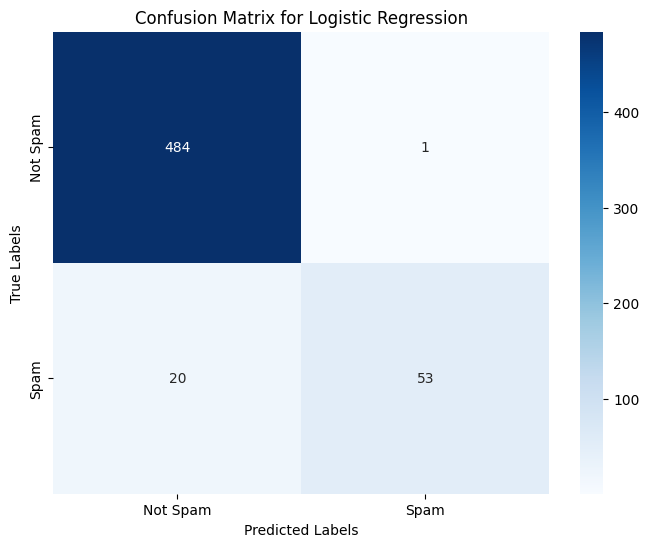

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# Evaluate Naive Bayes
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes:
Accuracy: 0.9498207885304659
Precision: 0.7472527472527473
Recall: 0.9315068493150684
F1 Score: 0.8292682926829268
Confusion Matrix:
 [[462  23]
 [  5  68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       485
           1       0.75      0.93      0.83        73

    accuracy                           0.95       558
   macro avg       0.87      0.94      0.90       558
weighted avg       0.96      0.95      0.95       558



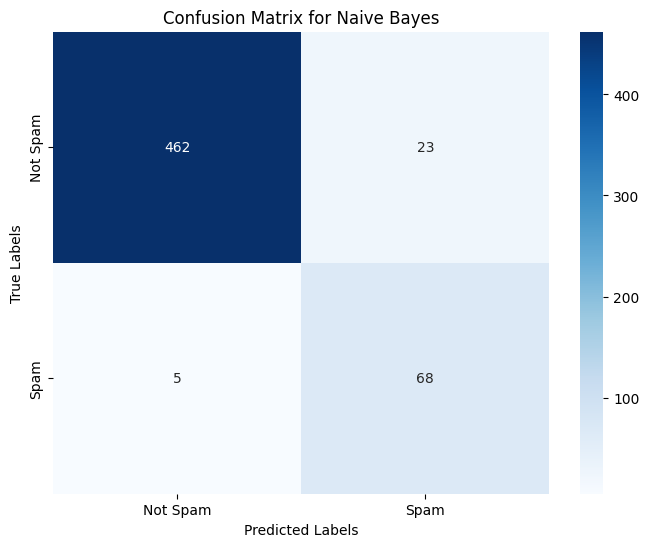

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()




### Discussion

1. **Logistic Regression**:
 - The logistic regression model performed excellently with an accuracy of 97.31%.
 - It has a perfect precision score, indicating no false positives.
 - The recall score is lower, suggesting some spam messages were missed.

2. **Naive Bayes**:
 - The Naive Bayes model also performed well with an accuracy of 94.98%.
 - It has a high recall, indicating it successfully identified most spam messages.
 - However, the precision is lower than logistic regression, indicating more false positives.

### Conclusion

Both models perform well for spam detection. Logistic regression provides higher precision, making it suitable when minimizing false positives is crucial. Naive Bayes offers higher recall, making it ideal for applications prioritizing the detection of spam messages, even at the cost of some false positives.


